In [158]:
import numpy as np
import pandas as pd

In [421]:
df = pd.read_excel("data/twitter_stress.xlsx")
df.head()

,text,hashtags,labels,Column1,_1
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1,NaN,NaN
1,And now we have been given the walkthru book b...,['walkthru'],0,NaN,NaN
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0,NaN,NaN
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1,NaN,NaN
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0,NaN,NaN


In [422]:
df['Column1'].unique()

array([nan])

In [423]:
df['_1'].unique()

array([nan])

In [424]:
df = df.drop(labels=['Column1', '_1'], axis=1)

In [425]:
df.head()

,text,hashtags,labels
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1
1,And now we have been given the walkthru book b...,['walkthru'],0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0


In [426]:
df['hashtags'].unique()

array(["['momlife', 'kids', 'tired']", "['walkthru']",
       "['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHealth', 'Quote', 'Mindfulness', 'GoldenHearts', 'IAM', 'ChooseLove']",
       ..., "['m1hl', 'stress', 'technostress', 'tips']",
       "['DogsofTwittter', 'shout', 'getoutforshout', 'charity', 'charitywalk', 'mentalhealth', 'MentalHealthMatters', 'September']",
       "['funny', 'tired', 'girldad']"], dtype=object)

In [427]:
df.dropna(inplace=True)

In [428]:
df.drop_duplicates(inplace=True)

In [429]:
# Remove the special characters from the text
import re
def remove_special_char(text):
    pattern = r'[^\w\s]|[\n\t\r]'
    return re.sub(pattern, '', text)

df['hashtags'] = df['hashtags'].apply(remove_special_char)
df['text'] = df['text'].apply(remove_special_char)
df.head()

,text,hashtags,labels
0,Being s mom is cleaning 247 the same shit over...,momlife kids tired,1
1,And now we have been given the walkthru book b...,walkthru,0
2,Wishing YOU Peace Joy Love JoyTrain MentalHea...,Peace Joy Love JoyTrain MentalHealth Quote Min...,0
3,speaknoevil monkey Can I Be Honest With You g...,therapy help NLP CBT hypnotherapy mentalhealth...,1
4,Psy Do u hv any regrets Me No Psy Are you happ...,,0


In [430]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [431]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    tokens = word_tokenize(text)
    filt_text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join (filt_text)

df['text'] = df['text'].apply(remove_stop_words)
df['hashtags'] = df['hashtags'].apply(remove_stop_words)
print(df['text'][0])

mom cleaning 247 shit end result everything mess momlife kids tired


In [432]:
print(df.describe)
print(df.info())

<bound method NDFrame.describe of                                                    text  \
0     mom cleaning 247 shit end result everything me...   
1     given walkthru book base whole school PD grinn...   
2     Wishing Peace Joy Love JoyTrain MentalHealth Q...   
3     speaknoevil monkey Honest globe showing Europe...   
4     Psy u hv regrets Psy happy Yes feel relieved G...   
...                                                 ...   
8895  Thank business questions today Selfgenerated b...   
8896  planning walking minds today woman walking red...   
8897  mobile phones Three Tips Reduce Technostress k...   
8898  purple heart Day 1 purple heart vets first Dog...   
8899  exactly Bella last night also favorite episode...   

                                               hashtags  labels  
0                                    momlife kids tired       1  
1                                              walkthru       0  
2     Peace Joy Love JoyTrain MentalHealth Quote Min...    

In [433]:
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8467 entries, 0 to 8899
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      8467 non-null   object
 1   hashtags  8467 non-null   object
 2   labels    8467 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 264.6+ KB
None


In [434]:
from sklearn.model_selection import train_test_split

In [435]:
x_text = df.iloc[:,0]
x_hash = df.iloc[:,1]
y = df['labels']
x_text_train, x_text_test, x_hash_train, x_hash_test, y_train, y_test = train_test_split(x_text, x_hash, y, test_size=0.2, random_state=42)

In [526]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [532]:
# Creating pipeline for text data
text_pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, stop_words = 'english', max_df = 0.80, ngram_range=(1,3))),
    ('clf', AdaBoostClassifier(estimator = LogisticRegression(C=2, max_iter=8000, solver="saga", penalty='l2', n_jobs=-1, random_state=42)))
])

# Creating pipeline for hash data
hash_pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, max_df = 0.80, ngram_range=(1,1))),
    ('clf', AdaBoostClassifier(estimator = LogisticRegression(C=2, max_iter=8000, solver="saga", penalty='l2', n_jobs=-1, random_state=42)))
])

In [533]:
text_pipeline.fit(x_text_train, y_train)
hash_pipeline.fit(x_hash_train, y_train)

f:\data-science\Projects\is-stress\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [504]:
import pickle
file = open("assets/text_pipeline.pkl", "wb")
pickle.dump(text_pipeline, file)
file.close()
file = open("assets/hashtag_pipeline.pkl", "wb")
pickle.dump(hash_pipeline, file)
file.close()

In [488]:
y_text_pred = text_pipeline.predict(x_text_test)
y_hash_pred = hash_pipeline.predict(x_hash_test)

In [501]:
text_weight = 0.7
hash_weight = 0.3

final_predictions = text_weight * y_text_pred + hash_weight * y_hash_pred

final_predictions = (final_predictions > 0.5).astype(int)


In [502]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, final_predictions))
print(accuracy_score(y_test, final_predictions))
print(classification_report(y_test, final_predictions))

[[615 199]
 [140 740]]
0.7998819362455726
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       814
           1       0.79      0.84      0.81       880

    accuracy                           0.80      1694
   macro avg       0.80      0.80      0.80      1694
weighted avg       0.80      0.80      0.80      1694



The user is Stressed


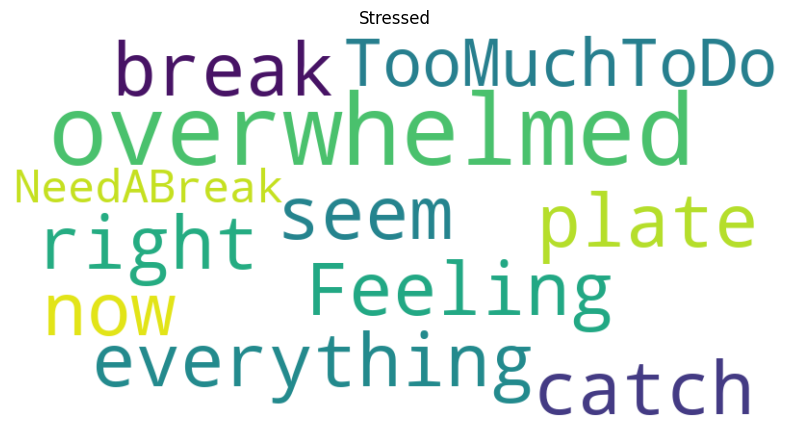

In [513]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_model = pickle.load(open('assets/text_pipeline.pkl', 'rb'))
hash_model = pickle.load(open('assets/hashtag_pipeline.pkl', 'rb'))

def calculate_prediction(text, hashtag):
    text_weight = 0.7
    hash_weight = 0.3
    final_predictions = text_weight * text + hash_weight * hashtag
    final_predictions = (final_predictions > 0.5).astype(int)
    return final_predictions


def check_if_user_is_stressed(text, hashtag):
    
    text_predict = text_model.predict(text)
    hash_predict = hash_model.predict(hashtag)
    outcome = calculate_prediction(text_predict, hash_predict)
    if outcome == 1:
        outcome = "Stressed"
    else:
        outcome = "Not stressed"
    print(f"The user is {outcome}")
    plot_word_cloud(text[0]+hashtag[0], outcome)

def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

text = ["Feeling overwhelmed with everything on my plate right now. Can't seem to catch a break. 😔"]
hashtag = ["#TooMuchToDo #NeedABreak #Overwhelmed"]
test_outcome = check_if_user_is_stressed(text, hashtag)

The user is Not stressed


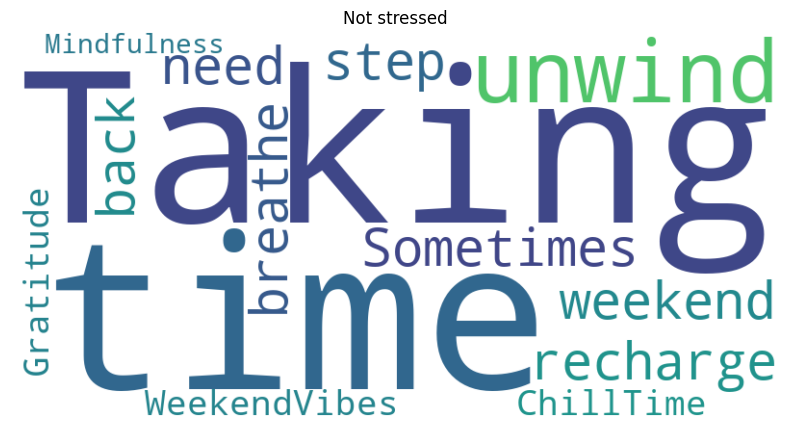

In [514]:
text = ["Taking some time to unwind and recharge this weekend. Sometimes you just need to step back and breathe."]
hashtag = ["#WeekendVibes #ChillTime #Gratitude #Mindfulness"]
test_outcome = check_if_user_is_stressed(text, hashtag)